In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import pearsonr
from matplotlib import pyplot
from numpy import cov


x = np.array([0.0643,	0.1101,	0.1140,	0.1231,	0.0786,	0.0071,	0.0632,	0.0627,	0.0194,	0.0192,	0.0507,	0.1076,	0.1535,	0.2383,	0.3525,	0.2630])
y = np.array([9123,	8468,	9125,	10840,	10955,	10614,	11544,	12112,	14923,	15469,	16108,	16060,	16641,	17076,	17493,	15696])

# pyplot.scatter(x, y)
# pyplot.show()




corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

# fig, ax = plt.subplots()
# ax.plot(x, y, linewidth=0, marker='s', label='Data points')
# ax.plot(x, 2, label="da")
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.legend(facecolor='white')
# plt.show()

Pearsons correlation: 0.462
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     3.803
Date:                Sat, 20 Nov 2021   Prob (F-statistic):             0.0715
Time:                        19:08:39   Log-Likelihood:                -149.37
No. Observations:                  16   AIC:                             302.7
Df Residuals:                      14   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04   

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


Parameters [1.39479274e+02 1.39446884e-01 1.32649964e+04]
RMSE: 3092.579480016704
R-squared: 0.0001703817365763527


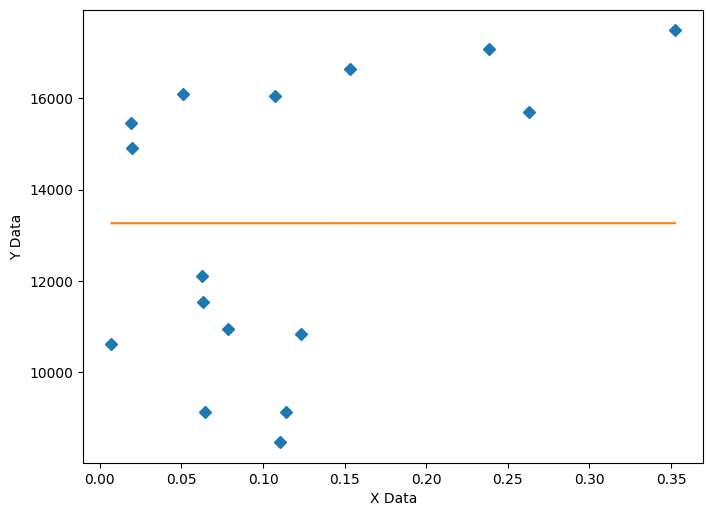

In [ ]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = numpy.array([0.0643,	0.1101,	0.1140,	0.1231,	0.0786,	0.0071,	0.0632,	0.0627,	0.0194,	0.0192,	0.0507,	0.1076,	0.1535,	0.2383,	0.3525,	0.2630])
yData = numpy.array([9123,	8468,	9125,	10840,	10955,	10614,	11544,	12112,	14923,	15469,	16108,	16060,	16641,	17076,	17493,	15696])


def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
    return  1.0 / (1.0 + numpy.exp(-a * (x-b))) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters, maxfev=1500)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)


def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

Parameters [119.4393749    5.97078806  58.03810831]
RMSE: 13.516841679815277
R-squared: 0.03095336506690216


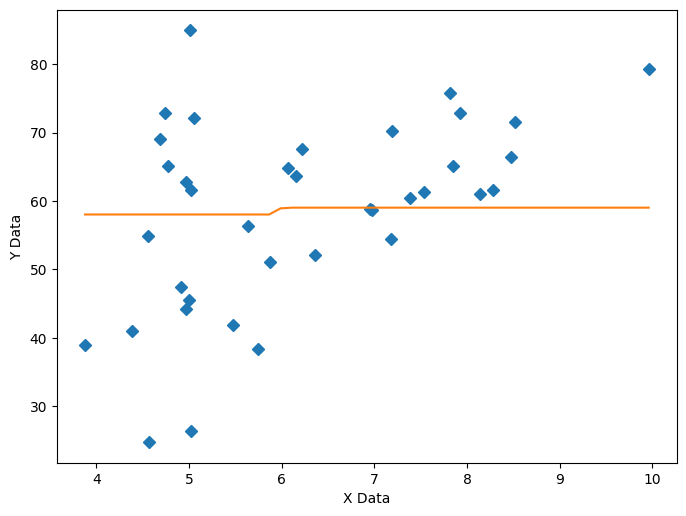

In [ ]:


import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = numpy.array([5.01,4.74,5.02,4.56,4.97,4.77,4.69,5.05,7.54,7.85,7.39,6.98,6.95,8.28,8.14,8.47,7.18,6.36,4.57,5.02,5.75,5.48,4.97,5.00,4.39,3.88,4.91,5.87,5.64,6.16,6.07,6.22,7.19,7.82,7.92,8.52,9.96])
yData = numpy.array([84.98, 72.89, 61.69,54.91,62.75,65.07, 69.01, 72.18, 61.28, 65.06, 60.50, 58.66, 58.89, 61.69, 61.10, 66.39, 54.45, 52.05, 24.74, 26.44, 38.32, 41.91, 44.15, 45.58, 40.93, 38.97, 47.42,51.09, 56.35, 63.69, 64.86, 67.56, 70.25, 75.84, 72.89, 71.59, 79.28])


def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
    return  1.0 / (1.0 + numpy.exp(-a * (x-b))) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters, maxfev=5000)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

In [ ]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

xData = numpy.array([19.1647, 18.0189, 16.9550, 15.7683, 14.7044, 13.6269, 12.6040, 11.4309, 10.2987, 9.23465, 8.18440, 7.89789, 7.62498, 7.36571, 7.01106, 6.71094, 6.46548, 6.27436, 6.16543, 6.05569, 5.91904, 5.78247, 5.53661, 4.85425, 4.29468, 3.74888, 3.16206, 2.58882, 1.93371, 1.52426, 1.14211, 0.719035, 0.377708, 0.0226971, -0.223181, -0.537231, -0.878491, -1.27484, -1.45266, -1.57583, -1.61717])
yData = numpy.array([0.644557, 0.641059, 0.637555, 0.634059, 0.634135, 0.631825, 0.631899, 0.627209, 0.622516, 0.617818, 0.616103, 0.613736, 0.610175, 0.606613, 0.605445, 0.603676, 0.604887, 0.600127, 0.604909, 0.588207, 0.581056, 0.576292, 0.566761, 0.555472, 0.545367, 0.538842, 0.529336, 0.518635, 0.506747, 0.499018, 0.491885, 0.484754, 0.475230, 0.464514, 0.454387, 0.444861, 0.437128, 0.415076, 0.401363, 0.390034, 0.378698])


def func(x, a, b, Offset): # Sigmoid A With Offset from zunzun.com
    return  1.0 / (1.0 + numpy.exp(-a * (x-b))) + Offset


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func(xData, *parameterTuple)
    return numpy.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minX, maxX]) # search bounds for a
    parameterBounds.append([minX, maxX]) # search bounds for b
    parameterBounds.append([0.0, maxY]) # search bounds for Offset

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(yData))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)



##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(xData), max(xData))
    yModel = func(xModel, *fittedParameters)

    # now the model as a line plot 
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

2021-11-22 11:02:08 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


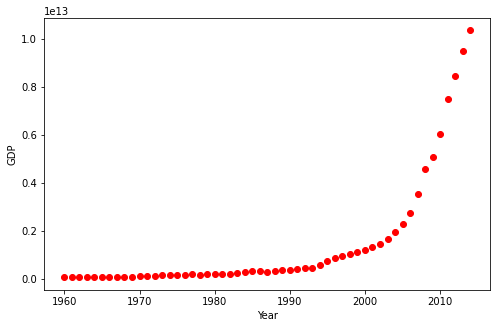

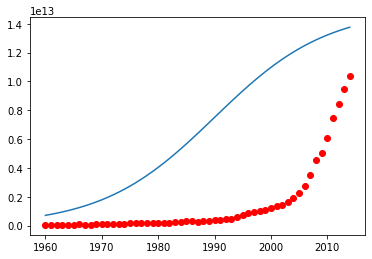

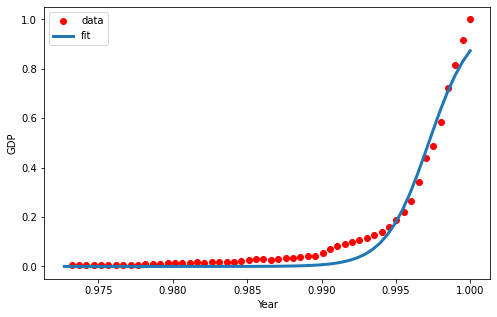

Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.94


In [ ]:
import numpy as np
import pandas as pd
#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
#df.head(10)
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y
beta_1 = 0.10
beta_2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)
#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
# Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)
# predict using test set
y_hat = sigmoid(test_x, *popt)
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_hat,test_y))

jghgjjgh


Initial Objective: 153.0
Final Objective: 0.07875727660985407
Solution
A = 1.0449117728306165
B = 0.9768138722858036
C = 0.023554984191568817
D = 0.022714751137964034
R^2 correlation = 0.9964354452281785


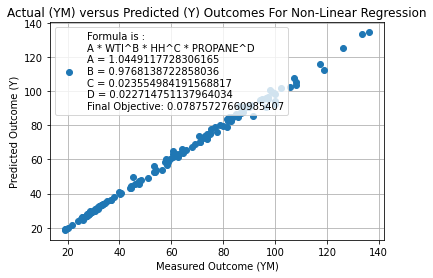

In [ ]:
# Energy price non-linear regression
# solve for oil sales price (outcome)
# using 3 predictors of WTI Oil Price,
#   Henry Hub Price and MB Propane Spot Price
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data file from URL address
data = 'https://apmonitor.com/me575/uploads/Main/oil_data.txt'
df = pd.read_csv(data)

xm1 = np.array(df["WTI_PRICE"])  # WTI Oil Price
xm2 = np.array(df["HH_PRICE"])   # Henry Hub Gas Price
xm3 = np.array(df["NGL_PRICE"])  # MB Propane Spot Price
ym = np.array(df["BEST_PRICE"])  # oil sales price received (outcome)

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )
    return y

# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(4)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP', bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')

cA = 'A = ' + str(x[0])
print(cA)
cB = 'B = ' + str(x[1])
print(cB)
cC = 'C = ' + str(x[2])
print(cC)
cD = 'D = ' + str(x[3])
print(cD)

cFormula = "Formula is : " + "\n" \
           + "A * WTI^B * HH^C * PROPANE^D"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n" + cObjective

#ym measured outcome
#y  predicted outcome

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.title('Actual (YM) versus Predicted (Y) Outcomes For Non-Linear Regression')
plt.plot(ym,y,'o')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend([cLegend])
plt.grid(True)
plt.show()